# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('20222703 Causes Of Death Clean Output V2.0.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201762 entries, 0 to 201761
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Causes name              201762 non-null  object 
 1   Causes Full Description  201762 non-null  object 
 2   Death Numbers            190575 non-null  float64
 3   Entity                   201762 non-null  object 
 4   Code                     200277 non-null  object 
 5   Year                     201762 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 9.2+ MB


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

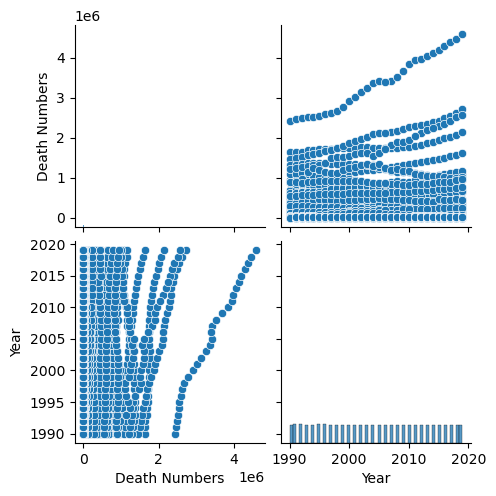

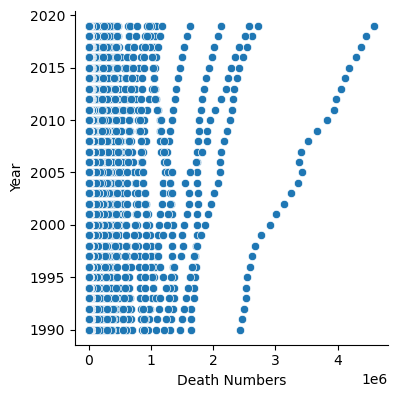

In [19]:
sns.pairplot(df)
# sns.pairplot(combo_df, x_vars='Gene Count', hue='Name Category')
sns.pairplot(df, x_vars='Death Numbers',  y_vars='Year', height=4, aspect=1, kind='scatter')
plt.show()

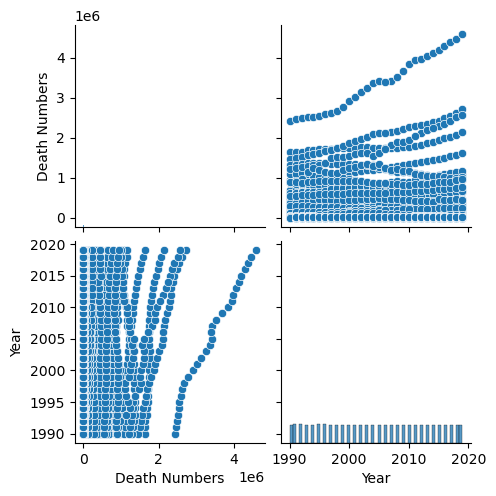

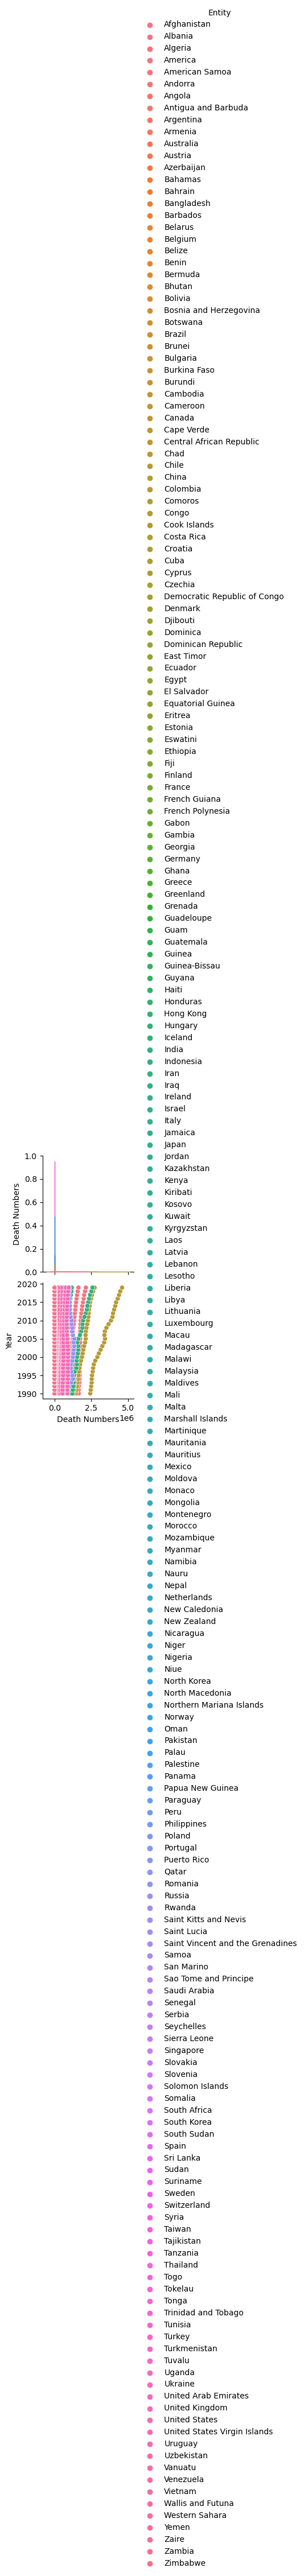

In [25]:
sns.pairplot(df)
# sns.pairplot(df, x_vars='', hue='Entity')
sns.pairplot(df, x_vars='Death Numbers', hue='Entity')
plt.show()

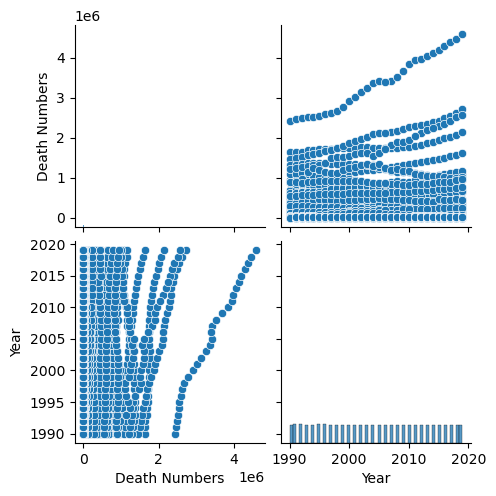

In [24]:
sns.pairplot(df)
# sns.pairplot(combo_df, x_vars='Gene Count', hue='Name Category')
plt.show()

C:\Users\tejas\AppData\Local\Temp\ipykernel_7400\1344996239.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)


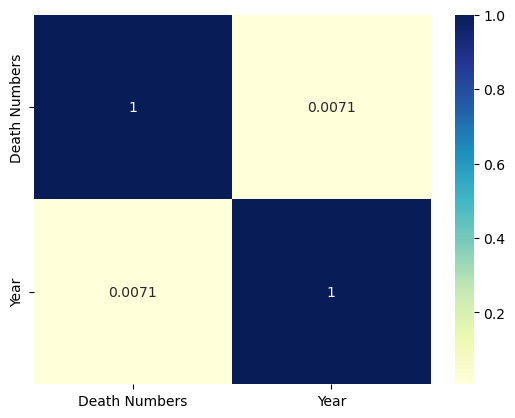

In [21]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [26]:
X = df['Year']
Y = df['Death Numbers']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train
Y_train

149987       3.0
137259    1279.0
21193        2.0
36364      169.0
119822       NaN
           ...  
2408         NaN
86663      175.0
117886       1.0
75500       36.0
101621       0.0
Name: Death Numbers, Length: 151321, dtype: float64

In [30]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(Y_train, X_train_sm).fit()

lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Death Numbers   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 17 Oct 2023   Prob (F-statistic):                nan
Time:                        17:15:39   Log-Likelihood:                    nan
No. Observations:              151321   AIC:                               nan
Df Residuals:                  151319   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
Year              nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                     4.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

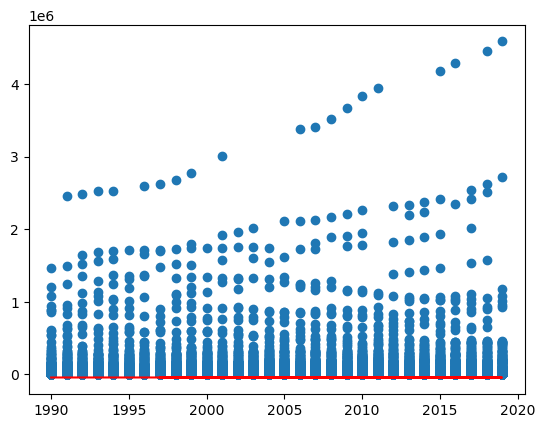

In [31]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, -43440 + 0.0592*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

In [32]:
Y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the Y_train data and predicted Y_data
res = (Y_train - Y_train_pred)

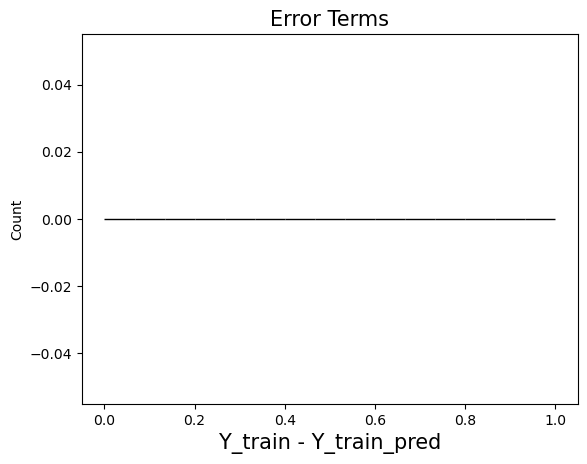

In [33]:
fig = plt.figure()
sns.histplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('Y_train - Y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? nan
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case. This is not related to my dataset
3. Was your plot of the error terms a bell curve? No